<a href="https://colab.research.google.com/github/valenciajaime/GCoupling_v0/blob/master/Electrodo_Tierra_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada

**Nombres:** 

German Moreno, Carlos Cardenas, Walter M. Villa, Hector D. Gomez, Jaime A. Valencia 


**Email:**

**Curso:**

Libro Tierras

**Fecha:**
Lunes  2022-jul-18

# Descripcion

**Objetivos:**
Presentacion modulo para obtener modelo circuital simple de un electro a tierra con python.

Sera la base del metodo para ajustar parametros a partir de señales medidas.


Referencia modelo: 

IEC TR 60071-4 Computational guide to insulation co-ordination and modelling of electrical networks.pdf.

[Doc one drive: sec 7.6.11](https://udeaeduco-my.sharepoint.com/:b:/g/personal/jalejandro_valencia_udea_edu_co/Ee2S5Pk_HH1HkxbEzFPmIzABOaMzTEjYvyOj4fzNlFCcYg?e=7zAtCD)



**Desarrollo:**


Modelo de circuito implementado de la clase MElectrodoT01() con ajuste de la solucion usando fuente de corriente y fuente de voltaje. Ver en [lcolab Electrodo_Tierra_03](https://colab.research.google.com/drive/1M8bloIGamM-RBQVKcqNjWkf2Mcumz53R?usp=sharing) el caso particular antes de crea la clase.

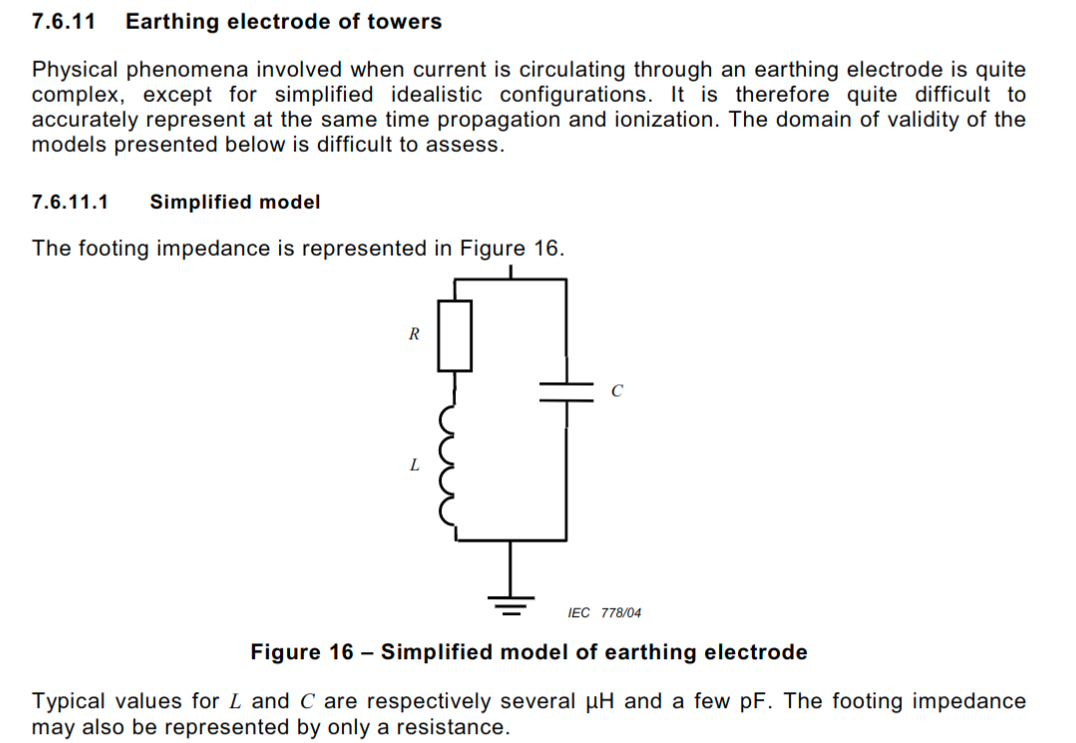

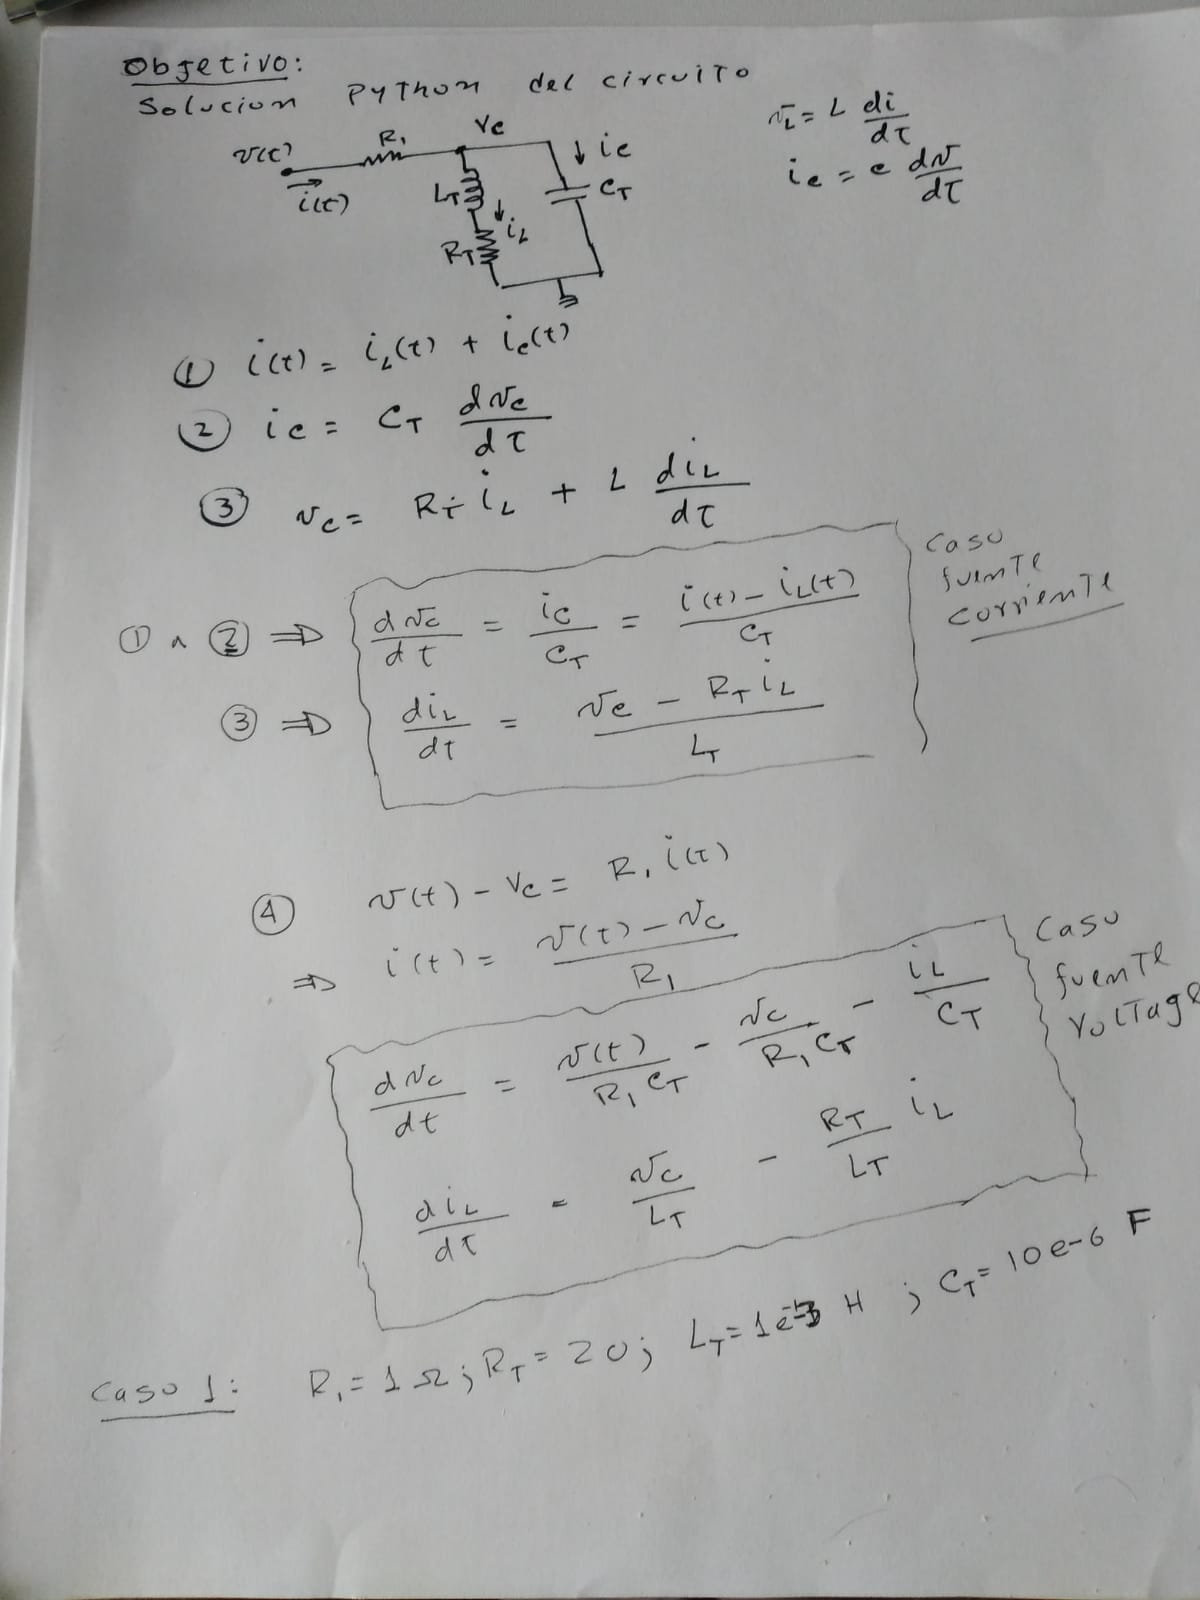

# Mododulos y funciones

Cargar Modulo_ET01.py [GDrive](https://drive.google.com/file/d/1MLLpcVQYNQylY-DohKhyoVND7laYPH-P/view?usp=sharing) en este colab para importarlo.

In [ ]:
import  matplotlib.pyplot as plt
import numpy as np
from Modulo_ET01 import *  ##importacion de clases y funciones



# Uso class MElectrodoT01()

1. Crear objeto de la class MElectrodoT01()

In [ ]:
print("Se crea objeto E2 de la clase MElectrodoT01()")
E2 = MElectrodoT01(1.0, 10, 70e-3, 400e-6)


Se crea objeto E2 de la clase MElectrodoT01()


In [ ]:
#presentacion clase
E2

ElectrodoT:
R1=1.0 ohms
RT=10 ohms
LT=0.07 henrios
CT=0.0004 faradios

2. Cargar datos de tension y corriente tomados de una medida en un electrodo de puesta a tierra. Cargar los archivos I_hidroslta09k.adf, V_hidrosolta09k.adf, que son simulaciones de un electrodo de tierra en ATP y se capturan datos de corriente y voltaje en archivos. [Carpeta gdrive](https://drive.google.com/drive/folders/12xgQEgTx4hUDpoHK8XJLs5pJB5XgM1WN?usp=sharing)

In [ ]:
#Lectura de datos de entrada de la simulacion en funcion del tiempo
E2.Get_Vdatos('V_hidrosolta09k.adf') #V_hidrosolta07.adf
E2.Get_Idatos('I_hidrosolta09k.adf') #I_hidrosolta07.adf


Clase My_signal02
Clase My_signal02


'Atributo: F_curr objeto My_signal02'

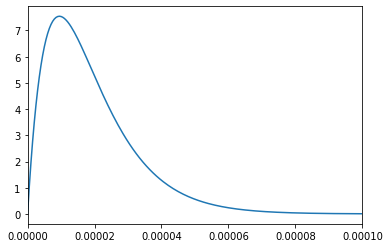

In [ ]:
##observacion datos leidos
##Entrada de corriente
Ti = E2.F_curr.Time
I_t = E2.F_curr.Valores
plt.plot(Ti,I_t)
plt.xlim(0,1e-4)#Para variar ventana en eje tiempo
plt.show()

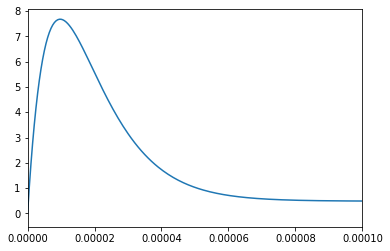

In [ ]:
##observacion datos leidos
##Entrada de voltaje
Tv = E2.F_volt.Time
V_t = E2.F_volt.Valores
plt.plot(Tv,V_t)
plt.xlim(0,1e-4)#Para variar ventana en eje tiempo
plt.show()

3. Ajustar parametros mediante optimizacion usando los metodos 

Optim_Param01(): [Optimizacion de parametros usando fuente de voltaje]

Optim_Param02():[Optimizacion de parametros usando fuente de corriente].



In [ ]:
##optimizar parametros [R1, RT, LT, CT]
## el punto inicial es el definido al crear el objeto
## Se ajustan los parametros solucionando el cirutio electrico de manera dinamica y comparando
## el voltaje de entrada (se asume fuente de corriente) con los valores leidos del archivo 
## V_hidrosolta09k.adf (simulado en ATP)

E2.Optim_Param02()
print("Resultados optimizacion(R1,RT,LT,CT]: ",E2.P_optFI.x)

Optimization terminated successfully.
         Current function value: 0.000088
         Iterations: 8
         Function evaluations: 1008
Resultados optimizacion(R1,RT,LT,CT]:  [9.99989250e-01 9.99769904e+00 6.99838540e-02 4.00092569e-04]


4. Observacion de la solucion de la EDO segun la entrada que asuma.

In [ ]:
E2.SolvEDO_Fcurr()

'Atributo EDO_sol_fi {dict}'

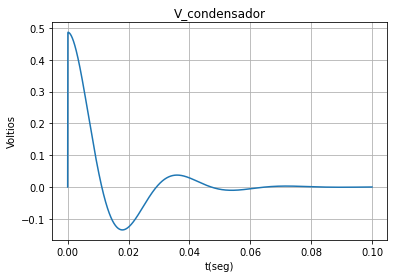

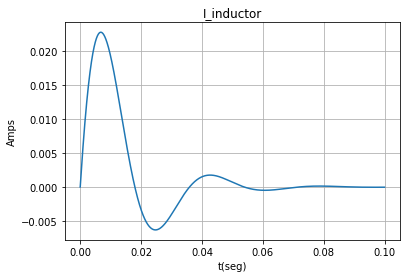

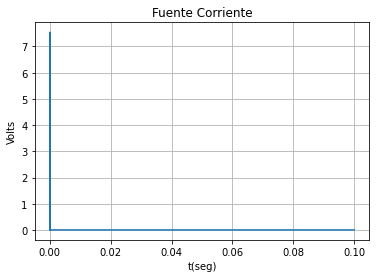

In [ ]:
E2.Show_EDO_Fcurr()

In [ ]:
E2.SolvEDO_Fvolt()

'Atributo EDO_sol_fv {dict}'

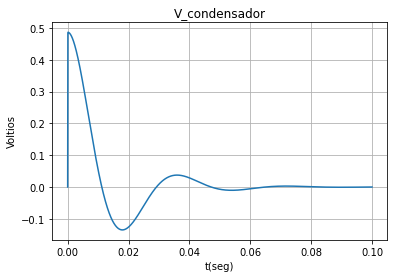

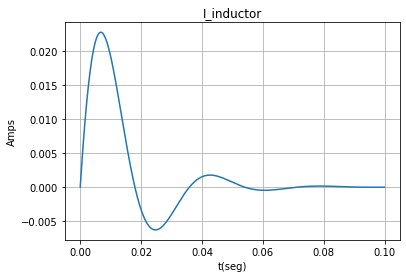

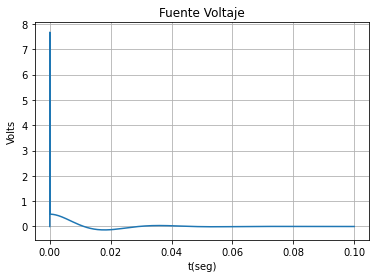

In [ ]:
E2.Show_EDO_Fvolt()

# Impedancia Zw

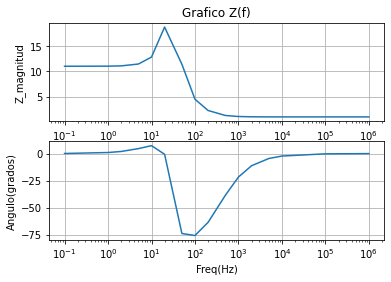

'Grafico Z(f)'

In [ ]:
##motrar funcion de la impedancia en frecuencia
f_hz = [1e-1,1, 0.2e1,0.5e1,1e1,0.2e2,0.5e2,1e2,0.2e3,0.5e3,1e3,0.2e4,0.5e4,1e4,1e5,1e6]
E2.Show_Zfreq(f_hz) #[1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]

In [ ]:
##Calcula la impedancia del circuito equivalente para la lista de frecuencias
## en Hertz dadas.
print("Para una frecuencia: ",E2.ImpedanciaZf_01(10))
print("Para una lista: ",E2.ImpedanciaZf_02([1,10,100,1000]))

Para una frecuencia:  (12.7054168996791+1.6373269969163182j)
Para una lista:  [11.01580409+0.18830651j 12.7054169 +1.637327j    1.09311109-4.3513498j
  1.00000819-0.39824745j]


# Metodo obtencion Rama  KIZILCAY (ATP)

Se requiere modulo vectfit.py [Modulo](https://drive.google.com/file/d/1fn-I_rcDGu7MF-xXt_OI6PNL3ILLJIu3/view?usp=sharing) [Rep_GH_Phild R](https://github.com/PhilReinhold/vectfit_python)
[Rep_GH](https://github.com/artemiy-dmitriev/vectfit)

Prueba con un polo y un residuo

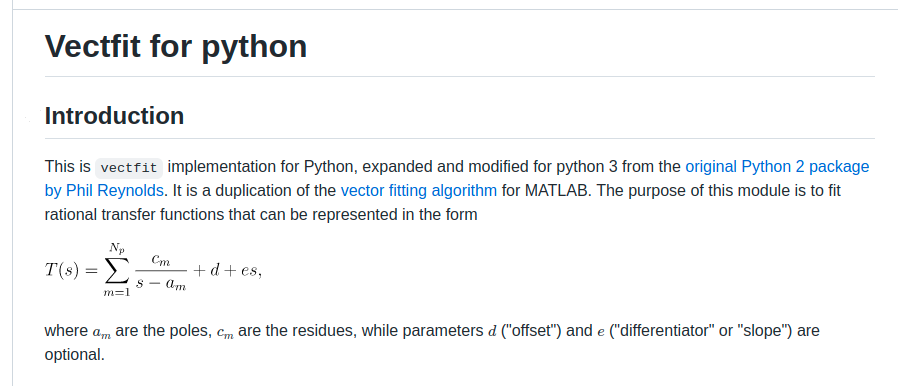

In [ ]:
##Caso de un polo
import vectfit
ze2 = E2.ImpedanciaZf_02(f_hz) #impedancias para el vector de frecuencias f_hz
ye2 = 1/ze2 #calculo vector de admitancias como se usa en Kilsicay(ATP)
F_s = 1j*2*np.pi*np.array(f_hz) # vector de frecuencias angulares

# Run algorithm, results hopefully match the known model parameters
poles, residues, d, h = vectfit.vectfit_auto(ye2, F_s, n_poles=1)



poles: -2484.75 + 0j, -158.107 + 0j
residues: -2516.39 + 0j, 16.3865 + 0j
offset: 1
slope: 3.55271e-15


In [ ]:
#ajuste en frecuencia con vectorfitting
YE2_ajuste = vectfit.model(F_s, poles, residues, d, h)

Error_normaE:  4.075605577499884e-08


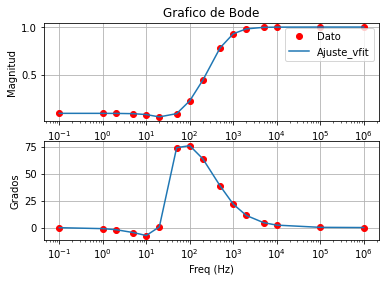

In [ ]:
##Graficos de bode DATOS PRUEBA
Error_norma = np.linalg.norm(ye2- YE2_ajuste)
print("Error_normaE: ",Error_norma)

plt.subplot(2,1,1)
plt.semilogx(f_hz,np.abs(ye2),"ro")
plt.semilogx(f_hz,np.abs(YE2_ajuste))
plt.legend(["Dato","Ajuste_vfit"])
plt.ylabel("Magnitud")
plt.title("Grafico de Bode")
plt.grid("on")

plt.subplot(2,1,2)
plt.semilogx(f_hz,np.angle(ye2, deg=True),"ro")
plt.semilogx(f_hz,np.angle(YE2_ajuste, deg=True))
plt.ylabel("Grados")
plt.xlabel("Freq (Hz)")
plt.grid("on")
plt.show()

# Obtencion Kisilcay = N(s)/D(s)

In [ ]:
import sympy as SP

s = SP.symbols("s")
nr = len(poles)

St = 0
for q in range(nr):
  si = residues[q]/(s - poles[q])
  St = St + si
St = St + (d + h*s)

print(St)

3.5527136788005e-15*s + 1.0 - 2516.38647460938/(s + 2484.74982875198) + 16.3864612579346/(s + 158.107279698285)


In [ ]:
R_k = SP.factor(SP.simplify(St))
R_k

0.0909090827003662*(9.94760190069866e-20*s**3 + 2.80000101335232e-5*s**2 + 0.00400000011041436*s + 1.0)/((0.000402455003086677*s + 1.0)*(0.00632481946377353*s + 1.0))

In [ ]:
print("Numerador: ")
SP.numer(R_k)


Numerador: 


9.04327363860934e-21*s**3 + 2.54545523683955e-6*s**2 + 0.000363636340839133*s + 0.0909090827003662

In [ ]:
print("Denominador; ")
SP.denom(R_k).expand()

Denominador; 


2.54545523681565e-6*s**2 + 0.00672727446686021*s + 1.0

# Modelo en ATP

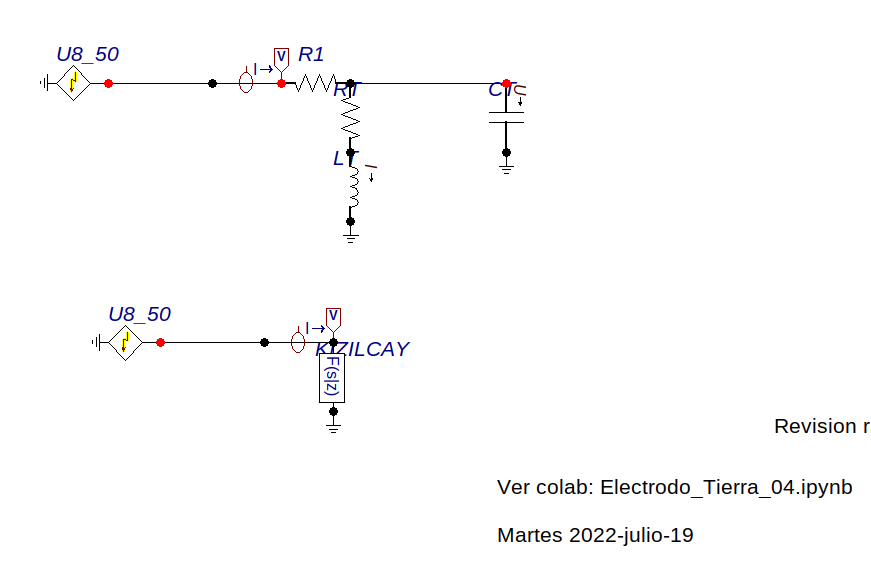

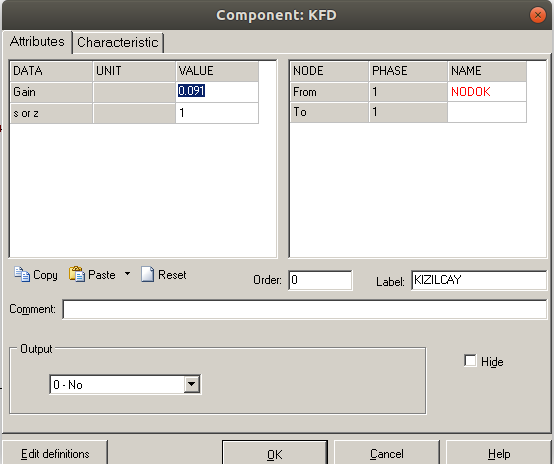

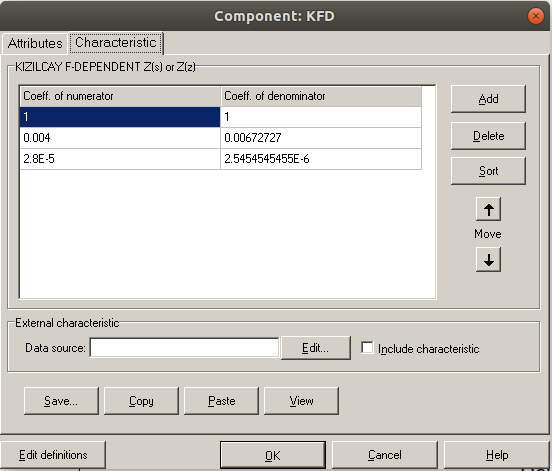

# Resultados y conclusiones

**Resultados y analisis:**


**Conclusiones:**


**Referencias:**